In [3]:
from gbstim.gb import GBCode
from gbstim.device import Device
from gbstim.bposd import BPOSD
import sinter
import matplotlib.pyplot as plt
import numpy as np
import pickle as pkl

In [4]:
l = 6
m = 6
device = Device((2*m, 2*l))
code = GBCode(device, [(0, 2), (0, 1), (3, 0)], [(1, 0), (2, 0), (0, 3)], l, m)
print(f'[{code.n}, {code.k}, {code.d}]')
pkl.dump(code, open(f'../scripts/codes/{code.n}-{code.k}-{code.d}-w-{6}.pkl', 'wb'))

[72, 12, 6]


In [5]:
display(device)

z@0   |d1@0  |z@6   |d1@6  |z@12  |d1@12 |z@18  |d1@18 |z@24  |d1@24 |z@30  |d1@30 |
------------------------------------------------------------------------------------------------
d2@0  |x@0   |d2@6  |x@6   |d2@12 |x@12  |d2@18 |x@18  |d2@24 |x@24  |d2@30 |x@30  |
------------------------------------------------------------------------------------------------
z@1   |d1@1  |z@7   |d1@7  |z@13  |d1@13 |z@19  |d1@19 |z@25  |d1@25 |z@31  |d1@31 |
------------------------------------------------------------------------------------------------
d2@1  |x@1   |d2@7  |x@7   |d2@13 |x@13  |d2@19 |x@19  |d2@25 |x@25  |d2@31 |x@31  |
------------------------------------------------------------------------------------------------
z@2   |d1@2  |z@8   |d1@8  |z@14  |d1@14 |z@20  |d1@20 |z@26  |d1@26 |z@32  |d1@32 |
------------------------------------------------------------------------------------------------
d2@2  |x@2   |d2@8  |x@8   |d2@14 |x@14  |d2@20 |x@20  |d2@26 |x@26  |d2@32 |x@32  |
-----

In [6]:
tasks = []
p_range = [1e-3,3e-3,5e-3,7e-3]
for p in p_range:
    tasks.append(sinter.Task(circuit=code.stim_circ(p, p, p, dec_type='Z', num_rounds=code.d), 
                                 json_metadata={'p': p, 
                                                'Code': f'[{code.n}, {code.k}, {code.d}] Weight {6}'}))

Problem Name: 1d5a219ff82b410586937d6c0fabba7d
Problem Type: TSP
Number of Nodes: 13
Rounded Euclidean Norm (CC_EUCLIDEAN)
CCtsp_solve_dat ...
Finding a good tour for compression ...
linkern ...
Starting Cycle: 259
   0 Steps   Best: 258   0.00 seconds
   6 Total Steps.
Best cycle length: 258
Lin-Kernighan Running Time: 0.00
LK Initial Run: 258.0
LK Run 0: 258.0
LK Run from best tour: 258.0
Time to find compression tour: 0.00 (seconds)
Set initial upperbound to 258 (from tour)
  LP Value  1: 223.000000  (0.00 seconds)
  LP Value  2: 258.000000  (0.00 seconds)
New lower bound: 258.000000
Exact lower bound: 258.000000
DIFF: 0.000000
Established Bound: 258
Optimal tour: 258
Total Time to solve TSP: 0.00
Problem Name: ec2b0ca006fb4e7aa2bfa0a193786174
Problem Type: TSP
Number of Nodes: 13
Rounded Euclidean Norm (CC_EUCLIDEAN)
CCtsp_solve_dat ...
Finding a good tour for compression ...
linkern ...
Starting Cycle: 259
   0 Steps   Best: 258   0.00 seconds
   6 Total Steps.
Best cycle length: 

In [7]:
samples = sinter.collect(
    num_workers=4,
    max_shots=1e9,
    max_errors=1000,
    tasks=tasks,
    decoders=['bposd'],
    custom_decoders={'bposd': BPOSD(max_iter=10_000, bp_method="ms", osd_order=10, osd_method="osd_cs")}
)

In [8]:
err_rates = [0 for _ in p_range]
for sample in samples:
    p = sample.json_metadata['p']
    err_rates[p_range.index(p)] = (1 - np.power(1 - sample.errors / sample.shots, 1 / float(code.d)))
    

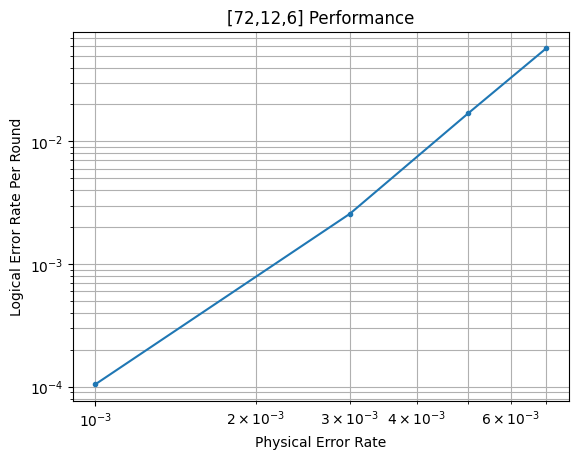

In [9]:
plt.plot(p_range, err_rates, marker='.')
plt.loglog()
plt.grid(which='both')
plt.title('[72,12,6] Performance')
plt.ylabel('Logical Error Rate Per Round')
plt.xlabel('Physical Error Rate')
plt.show()

### Movement Costs

In [10]:
def plot_movement_history(code):
    prev_pos = code.x_pos_history[0]
    for pos in code.x_pos_history[1:]:
        plt.plot(pos[0], pos[1], marker='o', color='black', markersize=3)
        plt.arrow(prev_pos[0], prev_pos[1], pos[0] - prev_pos[0], pos[1] - prev_pos[1], color='black', linewidth=0.5)
        prev_pos = pos
    
    plt.show()

Problem Name: 29a07e2d04bc4987ae8bd8b176475a21
Problem Type: TSP
Number of Nodes: 13
Rounded Euclidean Norm (CC_EUCLIDEAN)
CCtsp_solve_dat ...
Finding a good tour for compression ...
linkern ...
Starting Cycle: 259
   0 Steps   Best: 258   0.00 seconds
   6 Total Steps.
Best cycle length: 258
Lin-Kernighan Running Time: 0.00
LK Initial Run: 258.0
LK Run 0: 258.0
LK Run from best tour: 258.0
Time to find compression tour: 0.00 (seconds)
Set initial upperbound to 258 (from tour)
  LP Value  1: 223.000000  (0.00 seconds)
  LP Value  2: 258.000000  (0.00 seconds)
New lower bound: 258.000000
Exact lower bound: 258.000000
DIFF: 0.000000
Established Bound: 258
Optimal tour: 258
Total Time to solve TSP: 0.00
[72,12,6] Movement Cost: 2709.6898574477373


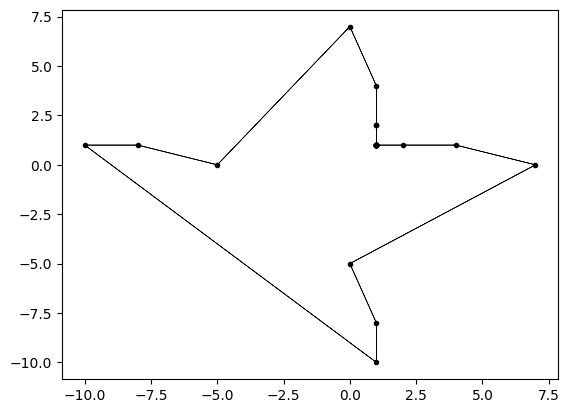

In [11]:
l = 6
m = 6
device = Device((2*m, 2*l))
code = GBCode(device, [(0, 2), (0, 1), (3, 0)], [(1, 0), (2, 0), (0, 3)], l, m)
circ = code.stim_circ(num_rounds=code.d)
print(f'[{code.n},{code.k},{code.d}] Movement Cost: {code.stab_move_time}')
pkl.dump(code, open(f'../scripts/codes/{code.n}-{code.k}-{code.d}-w-{6}.pkl', 'wb'))
plot_movement_history(code)

Problem Name: 8a7cad0adde54a8bb1e495d76a60fec2
Problem Type: TSP
Number of Nodes: 12
Rounded Euclidean Norm (CC_EUCLIDEAN)
CCtsp_solve_dat ...
Finding a good tour for compression ...
linkern ...
Starting Cycle: 494
   0 Steps   Best: 477   0.00 seconds
   1 Steps   Best: 476   0.00 seconds
   6 Total Steps.
Best cycle length: 476
Lin-Kernighan Running Time: 0.00
LK Initial Run: 476.0
LK Run 0: 476.0
LK Run from best tour: 476.0
Time to find compression tour: 0.00 (seconds)
Set initial upperbound to 476 (from tour)
  LP Value  1: 364.000000  (0.00 seconds)
  LP Value  2: 476.000000  (0.00 seconds)
New lower bound: 476.000000
Exact lower bound: 476.000000
DIFF: 0.000000
Established Bound: 476
Optimal tour: 476
Total Time to solve TSP: 0.00
[90,8,10] Movement Cost: 2974.9413980955615


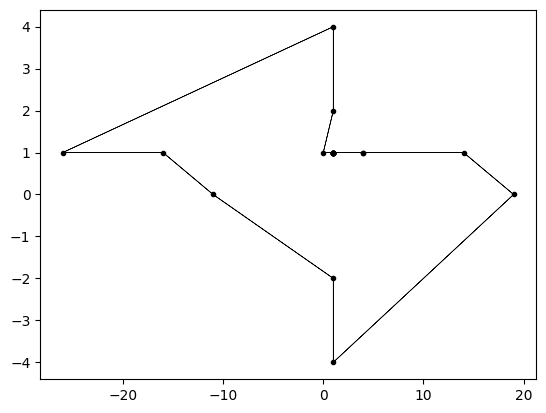

In [12]:
l = 15
m = 3
device = Device((2*m, 2*l))
code = GBCode(device, [(0, 1), (0, 2), (9, 0)], [(0, 0), (2, 0), (7, 0)], l, m)
circ = code.stim_circ(num_rounds=code.d)
print(f'[{code.n},{code.k},{code.d}] Movement Cost: {code.stab_move_time}')
pkl.dump(code, open(f'../scripts/codes/{code.n}-{code.k}-{code.d}-w-{6}.pkl', 'wb'))
plot_movement_history(code)

Problem Name: 73b0e4c6c1a14c4996a24ea5b4e9ad92
Problem Type: TSP
Number of Nodes: 13
Rounded Euclidean Norm (CC_EUCLIDEAN)
CCtsp_solve_dat ...
Finding a good tour for compression ...
linkern ...
Starting Cycle: 360
   0 Steps   Best: 360   0.00 seconds
   6 Total Steps.
Best cycle length: 360
Lin-Kernighan Running Time: 0.00
LK Initial Run: 360.0
LK Run 0: 360.0
LK Run from best tour: 360.0
Time to find compression tour: 0.00 (seconds)
Set initial upperbound to 360 (from tour)
  LP Value  1: 186.000000  (0.00 seconds)
  LP Value  2: 360.000000  (0.00 seconds)
New lower bound: 360.000000
Exact lower bound: 360.000000
DIFF: 0.000000
Established Bound: 360
Optimal tour: 360
Total Time to solve TSP: 0.00
[144,12,12] Movement Cost: 2970.4380259911077


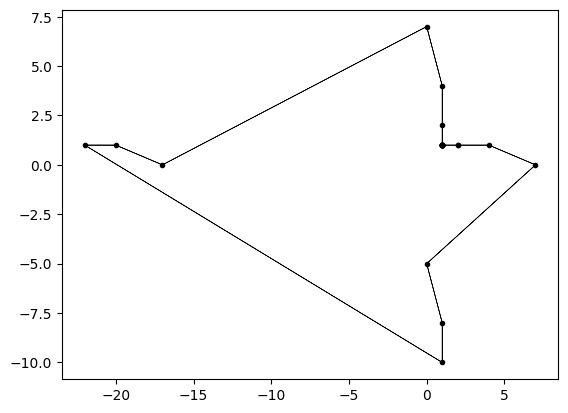

In [13]:
l = 12
m = 6
device = Device((2*m, 2*l))
code = GBCode(device, [(0, 1), (0, 2), (3, 0)], [(0, 3), (1, 0), (2, 0)], l, m)
circ = code.stim_circ(num_rounds=code.d)
print(f'[{code.n},{code.k},{code.d}] Movement Cost: {code.stab_move_time}')
pkl.dump(code, open(f'../scripts/codes/{code.n}-{code.k}-{code.d}-w-{6}.pkl', 'wb'))
plot_movement_history(code)

Problem Name: b2cdab52dc364d62a4084cc3574c9963
Problem Type: TSP
Number of Nodes: 17
Rounded Euclidean Norm (CC_EUCLIDEAN)
CCtsp_solve_dat ...
Finding a good tour for compression ...
linkern ...
Starting Cycle: 472
   0 Steps   Best: 418   0.00 seconds
   2 Steps   Best: 415   0.00 seconds
   8 Total Steps.
Best cycle length: 415
Lin-Kernighan Running Time: 0.00
LK Initial Run: 415.0
LK Run 0: 415.0
LK Run from best tour: 415.0
Time to find compression tour: 0.00 (seconds)
Set initial upperbound to 415 (from tour)
  LP Value  1: 351.000000  (0.00 seconds)
  LP Value  2: 408.000000  (0.00 seconds)
  LP Value  3: 415.000000  (0.00 seconds)
New lower bound: 415.000000
Exact lower bound: 415.000000
DIFF: 0.000000
Established Bound: 415
Optimal tour: 415
Total Time to solve TSP: 0.00
[128,16,8] Movement Cost: 3765.6576833125896


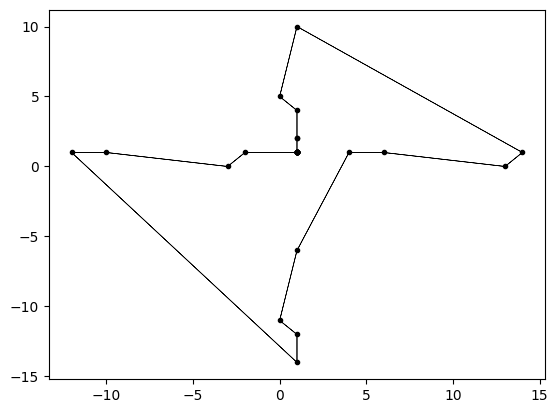

In [14]:
l = 8
m = 8
device = Device((2*m, 2*l))
code = GBCode(device, [(0, 1), (0, 2), (0, 5), (6, 0)], [(0, 2), (2, 0), (3, 0), (7, 0)], l, m)
circ = code.stim_circ(num_rounds=code.d)
print(f'[{code.n},{code.k},{code.d}] Movement Cost: {code.stab_move_time}')
pkl.dump(code, open(f'../scripts/codes/{code.n}-{code.k}-{code.d}-w-{8}.pkl', 'wb'))
plot_movement_history(code)

Problem Name: 323bc3c72ec94dfc9f2b4f15c5d335b0
Problem Type: TSP
Number of Nodes: 15
Rounded Euclidean Norm (CC_EUCLIDEAN)
CCtsp_solve_dat ...
Finding a good tour for compression ...
linkern ...
Starting Cycle: 1381
   0 Steps   Best: 1380   0.00 seconds
   7 Total Steps.
Best cycle length: 1380
Lin-Kernighan Running Time: 0.00
LK Initial Run: 1380.0
LK Run 0: 1380.0
LK Run from best tour: 1380.0
Time to find compression tour: 0.00 (seconds)
Set initial upperbound to 1380 (from tour)
  LP Value  1: 1217.000000  (0.00 seconds)
  LP Value  2: 1380.000000  (0.00 seconds)
New lower bound: 1380.000000
Exact lower bound: 1380.000000
DIFF: 0.000000
Established Bound: 1380
Optimal tour: 1380
Total Time to solve TSP: 0.01
[72,8,10] Movement Cost: 5254.252983635931


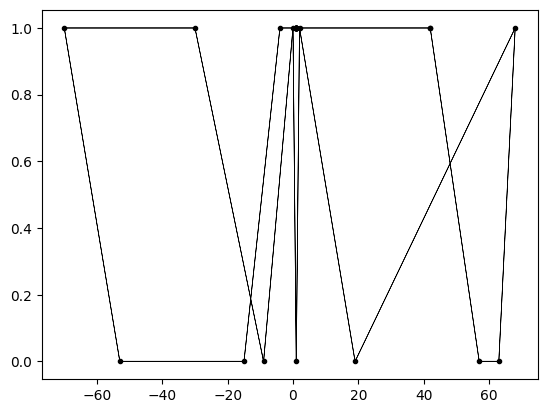

In [15]:
l = 36
m = 1
device = Device((2*m, 2*l))
code = GBCode(device, [(0, 0), (9, 0), (28, 0), (31, 0)], [(0, 0), (1, 0), (21, 0), (34, 0)], l, m)
circ = code.stim_circ(num_rounds=code.d)
print(f'[{code.n},{code.k},{code.d}] Movement Cost: {code.stab_move_time}')
pkl.dump(code, open(f'../scripts/codes/{code.n}-{code.k}-{code.d}-w-{8}.pkl', 'wb'))
plot_movement_history(code)

Problem Name: fc3ac114f6674d308ba49eca309397ca
Problem Type: TSP
Number of Nodes: 19
Rounded Euclidean Norm (CC_EUCLIDEAN)
CCtsp_solve_dat ...
Finding a good tour for compression ...
linkern ...
Starting Cycle: 656
   0 Steps   Best: 536   0.00 seconds
   9 Total Steps.
Best cycle length: 536
Lin-Kernighan Running Time: 0.00
LK Initial Run: 536.0
LK Run 0: 536.0
LK Run from best tour: 536.0
Time to find compression tour: 0.01 (seconds)
Set initial upperbound to 536 (from tour)
  LP Value  1: 373.500000  (0.00 seconds)
  LP Value  2: 466.000000  (0.00 seconds)
  LP Value  3: 536.000000  (0.00 seconds)
New lower bound: 536.000000
Exact lower bound: 536.000000
DIFF: 0.000000
Established Bound: 536
Optimal tour: 536
Total Time to solve TSP: 0.01
[96,10,12] Movement Cost: 4522.663665354421


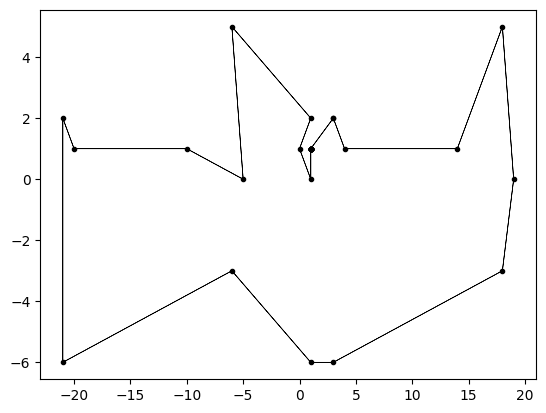

In [16]:
l = 12
m = 4
device = Device((2*m, 2*l))
code = GBCode(device, [(0, 0), (0, 1), (1, 1), (9, 0)], [(0, 0), (2, 0), (7, 0), (9, 2)], l, m)
circ = code.stim_circ(num_rounds=code.d)
print(f'[{code.n},{code.k},{code.d}] Movement Cost: {code.stab_move_time}')
pkl.dump(code, open(f'../scripts/codes/{code.n}-{code.k}-{code.d}-w-{8}.pkl', 'wb'))
plot_movement_history(code)